In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
url = "Ruter_data.csv"

"""
Multi line comment example pls use
"""

# Reading in the .csv
df = pd.read_csv(url, sep=';')
# Display what the df object now has read
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
"""
TurId = Busnr?-år-måned-dag-tid-tidssone (???????)
Virker som at det er en "tur" per stopp i en linje


TASK 1.1 - Identify 5 unique features from this data set.
---------
Planned Features:
X 1. Avgangs forsinkelser ved å se faktisk avgang vs real avgang
X 2. Annkomst Forsinkelser basert på real ankomst vs faktisk annkomst 
3. Forsinkelser per fylke - can you even do this?

X 4. Prosentvis passasjerer per linje (min og max value, finne mest og minst poplær linje)
5. Forsinkelser per linje
6. Passasjerer per time i døgnet?

7. Holdeplasser med størst differanse mellom faktisk annkomst og avreise

Actual Features:
1. Faktisk_Ventetid_Sekunder
2. Faktisk_Forsinkelse_Sekunder
3. Ledige_Plasser
4. Prosent_Full
5. Forsinkelse_Per_Prosent_Full

Bonus:
Plotte forsinkelser per tid på døgnet
"""

#TODO remove this
print() #empty makeshift print to avoid comments from being printed

In [4]:
"""
TASK 1.2 - Apply feature engineering on them in Python.
--------

TODO:
- all the things
- actually engineer the features
"""
print()

In [5]:
"""
PHASE 1 - Cleaning the data a little
"""

#Not finding any nan values.
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

<AxesSubplot:>

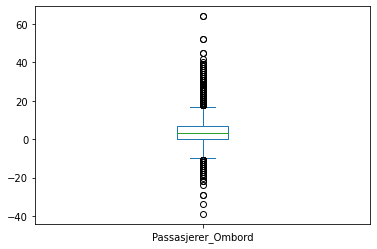

In [6]:
# We see that some trips have recorded negative passenger values, we assume this is due to sensor errors
df['Passasjerer_Ombord'].plot.box()

<AxesSubplot:>

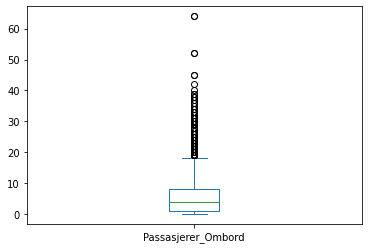

In [7]:
# Setting removing the rows with negative values from the dataset.
# Could have either just set them to abs(Passasjerer_Ombord) or zero, 
# but since we do not know the nature of the error then we deem it safest to just delete the affected rows

df = df[df.Passasjerer_Ombord >= 0]

# Plotting again to check that all negative values are removed.
df['Passasjerer_Ombord'].plot.box()

In [8]:
# Engineering the first value, Faktisk_Ventetid

# First we need to make the relevant columns into the datetime format to be able to do calculations with them

#TODO - Remove this if not actually needed
#df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], format='%H:%M', errors='coerce').dt.time
#df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], format='%H:%M', errors='coerce').dt.time
#df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], format='%H:%M', errors='coerce').dt.time
#df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], format='%H:%M', errors='coerce').dt.time
#errors='coerce'  puts a NaT value (NaT = dummy var for missing value)

#df.head()


In [9]:
df['Faktisk_Ventetid_Sekunder'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce').view(int)/ 10**9 - pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce').view(int)/ 10**9
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Faktisk_Ventetid_Sekunder
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,6.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,6.0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,25.0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,22.0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,40.0


In [10]:
df['Faktisk_Ventetid_Sekunder'] = pd.to_numeric(df['Faktisk_Ventetid_Sekunder'], downcast='integer')

<AxesSubplot:>

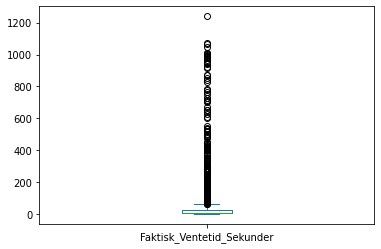

In [11]:
# Cleaning out the wierd and wrong values
df = df[df.Faktisk_Ventetid_Sekunder <= 100000]
df = df[df.Faktisk_Ventetid_Sekunder >= 0]

df['Faktisk_Ventetid_Sekunder'].plot.box()

In [12]:
"""
Considering the first value engineered and cleaned.

Now making Faktisk forsinkelse per trip
"""

df['Faktisk_Forsinkelse_Sekunder'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce').view(int)/ 10**9 - pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce').view(int)/ 10**9
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Faktisk_Ventetid_Sekunder,Faktisk_Forsinkelse_Sekunder
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,6.0,53.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,6.0,20.0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,25.0,-4.0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,22.0,64.0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,40.0,73.0


<AxesSubplot:>

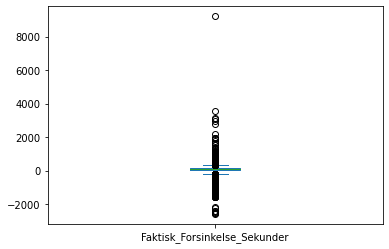

In [13]:
#Checking for anomalies
# Cleaning out the wierd and wrong values
df = df[df.Faktisk_Forsinkelse_Sekunder <= 1000000]
df = df[df.Faktisk_Forsinkelse_Sekunder >= -1000000]

df['Faktisk_Forsinkelse_Sekunder'].plot.box()

<AxesSubplot:>

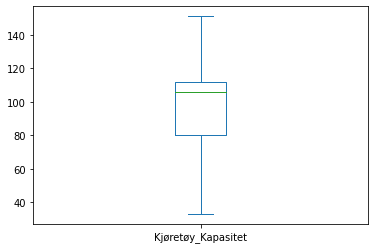

In [14]:
"""
Considering Second Feature engineered

Enineering third feature, Ledige_Plasser
"""

#Checking capasity values
df['Kjøretøy_Kapasitet'].plot.box()

<AxesSubplot:>

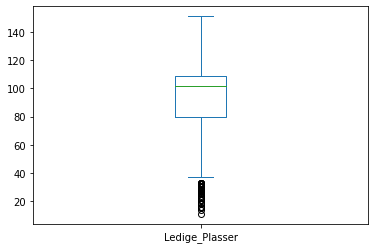

In [15]:
df['Ledige_Plasser'] = df['Kjøretøy_Kapasitet'] - df['Passasjerer_Ombord']

df['Ledige_Plasser'].plot.box()

In [16]:
"""
Looks okay.
Consering third feature engineered.

Moving on to engineer percentage of bus filled.
"""

# Setting percentage full in actual percentage value. tho like who even reads percentage as that i dunno
# shareholders?
df['Prosent_Full'] = df['Passasjerer_Ombord'] / df['Kjøretøy_Kapasitet'] * 100

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Faktisk_Ventetid_Sekunder,Faktisk_Forsinkelse_Sekunder,Ledige_Plasser,Prosent_Full
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:53,10:53:59,10:53:00,10:53:00,112,5,6.0,53.0,107,4.464286
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:20,13:12:26,13:12:00,13:12:00,112,5,6.0,20.0,107,4.464286
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:18:56,10:19:21,10:19:00,10:19:00,112,6,25.0,-4.0,106,5.357143
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:52:04,13:52:26,13:51:00,13:51:00,112,10,22.0,64.0,102,8.928571
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:34:13,07:34:53,07:33:00,07:33:00,112,10,40.0,73.0,102,8.928571


<AxesSubplot:>

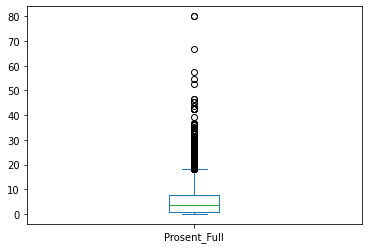

In [17]:
df['Prosent_Full'].plot.box()

<AxesSubplot:>

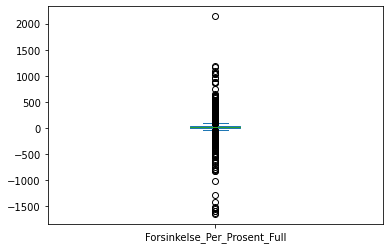

In [18]:
"""
Values looks okay. Considering forth feature fully engineered.
Next = Forsinkelse_Per_Prosent_Full
"""

# The two values we are using are already clean so skipping the cleaning part
# However, to avoid zerodivision, we remove where percentage full is zero

df = df[df.Prosent_Full != 0]

df['Forsinkelse_Per_Prosent_Full'] = df['Faktisk_Forsinkelse_Sekunder'] / df['Prosent_Full']

df['Forsinkelse_Per_Prosent_Full'].plot.box()

In [19]:
"""
TODO - Write like a real human
Fifth also looks good, moving on to the funky plots
"""

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Faktisk_Ventetid_Sekunder,Faktisk_Forsinkelse_Sekunder,Ledige_Plasser,Prosent_Full,Forsinkelse_Per_Prosent_Full
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:59,10:53:00,10:53:00,112,5,6.0,53.0,107,4.464286,11.872000
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:26,13:12:00,13:12:00,112,5,6.0,20.0,107,4.464286,4.480000
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:19:21,10:19:00,10:19:00,112,6,25.0,-4.0,106,5.357143,-0.746667
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:52:26,13:51:00,13:51:00,112,10,22.0,64.0,102,8.928571,7.168000
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:34:53,07:33:00,07:33:00,112,10,40.0,73.0,102,8.928571,8.176000


In [20]:
"""
TASK 1.3 - Visualize each feature in the form of a graph using python libraries.

TODO:
- Use seaborn to make 2D plots of our super good feature engineering whoop
"""
print()

In [21]:
"""
BONUS - 3D plots

- Seaborn 3D plot???

- Output a engineered .csv for mad flex
"""

'\nBONUS - 3D plots\n\n- Seaborn 3D plot???\n\n- Output a engineered .csv for mad flex\n'